<a href="https://colab.research.google.com/github/EthelFrancis/Chiamaka-Restaurant-Project/blob/main/Chiamaka_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME: FRANCIS CHIAMAKA ETHEL**

The aim of this project is to study the dataset gotten from several restaurants around the world to get insight on a number of variables like their cuisines, the city in which they are located, how much customers love the dishes they purchase from these restaurants, the nature of service these restaurants offer and how well customers rate them.
At the end of this study a predictive model would be done to predict how much customers are delighted in particular restaurants and what they offer

# **WEEK 1: DATA EXPLORATION**
1.   Dataset Overview
2.   Analysing aggregate rating: Checking for imbalances
3.   Calculating statistics for numerical columns; exploring categorical columns and checking for top 5 cuisines and cities.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://github.com/Oyeniran20/axia_class_cohort_7/raw/refs/heads/main/Dataset%20.csv')

# **Dataset Overview**

In [ ]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.shape

(9551, 21)

The data set contains 9551 rows and 21 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
#checking for missing values
df.isnull().sum().sort_values(ascending=False)

,0
Cuisines,9
Restaurant Name,0
Country Code,0
City,0
Restaurant ID,0
Address,0
Locality,0
Longitude,0
Locality Verbose,0
Latitude,0


In [ ]:
missing_values = df.isnull().mean()*100
missing_values.sort_values(ascending=False)

,0
Cuisines,0.094231
Restaurant Name,0.000000
Country Code,0.000000
City,0.000000
Restaurant ID,0.000000
Address,0.000000
Locality,0.000000
Longitude,0.000000
Locality Verbose,0.000000
Latitude,0.000000


Due to the fact that having missing values can affect our prediction, it was necessary to find out the amount of missing value and its percentage. In the cuisine column I discovered that there are 9 rows without inputed data. This gives me an insight as to how I deal with my data so I don't have a model that predicts in a biased way.
Cuisine column is not dropped despite having missing data because of its importance

In [ ]:
# Checking Duplicate Data
df.duplicated().sum()

np.int64(0)

**Checking for Incorrect Values in the Data Set and Replacing Them**

In [ ]:
df['Restaurant Name']

,Restaurant Name
0,Le Petit Souffle
1,Izakaya Kikufuji
2,Heat - Edsa Shangri-La
3,Ooma
4,Sambo Kojin
...,...
9546,Naml۱ Gurme
9547,Ceviz A��ac۱
9548,Huqqa
9549,A���k Kahve


In [ ]:
import re

In [ ]:
df['Restaurant Name'] = df['Restaurant Name'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))

In [ ]:
df['Restaurant Name']

,Restaurant Name
0,Le Petit Souffle
1,Izakaya Kikufuji
2,Heat Edsa Shangri La
3,Ooma
4,Sambo Kojin
...,...
9546,Naml۱ Gurme
9547,Ceviz A ac۱
9548,Huqqa
9549,A k Kahve


In [ ]:
df['City']

,City
0,Makati City
1,Makati City
2,Mandaluyong City
3,Mandaluyong City
4,Mandaluyong City
...,...
9546,��stanbul
9547,��stanbul
9548,��stanbul
9549,��stanbul


In [ ]:
df['City'] = (
    df.City.str.extract(r'([a-zA-Z\s]+)')
)

In [ ]:
df['City']

,City
0,Makati City
1,Makati City
2,Mandaluyong City
3,Mandaluyong City
4,Mandaluyong City
...,...
9546,stanbul
9547,stanbul
9548,stanbul
9549,stanbul


In [ ]:
df['City'] = df['City'].replace('stanbul','Istanbul')

In [ ]:
df['City']

,City
0,Makati City
1,Makati City
2,Mandaluyong City
3,Mandaluyong City
4,Mandaluyong City
...,...
9546,Istanbul
9547,Istanbul
9548,Istanbul
9549,Istanbul


In [ ]:
df['Address']

,Address
0,"Third Floor, Century City Mall, Kalayaan Avenu..."
1,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi..."
2,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal..."
3,"Third Floor, Mega Fashion Hall, SM Megamall, O..."
4,"Third Floor, Mega Atrium, SM Megamall, Ortigas..."
...,...
9546,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ..."
9547,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd..."
9548,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N..."
9549,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N..."


In [ ]:
df['Address'] = df['Address'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
df['Address']

,Address
0,Third Floor Century City Mall Kalayaan Avenue ...
1,Little Tokyo 2277 Chino Roces Avenue Legaspi V...
2,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...
3,Third Floor Mega Fashion Hall SM Megamall Orti...
4,Third Floor Mega Atrium SM Megamall Ortigas Ma...
...,...
9546,Kemanke Karamustafa Paa Mahallesi R۱ht۱m Cadde...
9547,Kouyolu Mahallesi Muhittin st_nda Caddesi No 8...
9548,Kuru_eme Mahallesi Muallim Naci Caddesi No 56 ...
9549,Kuru_eme Mahallesi Muallim Naci Caddesi No 64B...


In [ ]:
df['Locality']

,Locality
0,"Century City Mall, Poblacion, Makati City"
1,"Little Tokyo, Legaspi Village, Makati City"
2,"Edsa Shangri-La, Ortigas, Mandaluyong City"
3,"SM Megamall, Ortigas, Mandaluyong City"
4,"SM Megamall, Ortigas, Mandaluyong City"
...,...
9546,Karak�_y
9547,Ko��uyolu
9548,Kuru�_e��me
9549,Kuru�_e��me


In [ ]:
df['Locality'] = df['Locality'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
df['Locality']

,Locality
0,Century City Mall Poblacion Makati City
1,Little Tokyo Legaspi Village Makati City
2,Edsa ShangriLa Ortigas Mandaluyong City
3,SM Megamall Ortigas Mandaluyong City
4,SM Megamall Ortigas Mandaluyong City
...,...
9546,Karak_y
9547,Kouyolu
9548,Kuru_eme
9549,Kuru_eme


In [ ]:
df['Locality Verbose']

,Locality Verbose
0,"Century City Mall, Poblacion, Makati City, Mak..."
1,"Little Tokyo, Legaspi Village, Makati City, Ma..."
2,"Edsa Shangri-La, Ortigas, Mandaluyong City, Ma..."
3,"SM Megamall, Ortigas, Mandaluyong City, Mandal..."
4,"SM Megamall, Ortigas, Mandaluyong City, Mandal..."
...,...
9546,"Karak�_y, ��stanbul"
9547,"Ko��uyolu, ��stanbul"
9548,"Kuru�_e��me, ��stanbul"
9549,"Kuru�_e��me, ��stanbul"


In [ ]:
df['Locality Verbose'] = df['Locality Verbose'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
df['Locality Verbose']

,Locality Verbose
0,Century City Mall Poblacion Makati City Makati...
1,Little Tokyo Legaspi Village Makati City Makat...
2,Edsa ShangriLa Ortigas Mandaluyong City Mandal...
3,SM Megamall Ortigas Mandaluyong City Mandaluyo...
4,SM Megamall Ortigas Mandaluyong City Mandaluyo...
...,...
9546,Karak_y stanbul
9547,Kouyolu stanbul
9548,Kuru_eme stanbul
9549,Kuru_eme stanbul


In [ ]:
df['Locality Verbose'].unique()

array(['Century City Mall Poblacion Makati City Makati City',
       'Little Tokyo Legaspi Village Makati City Makati City',
       'Edsa ShangriLa Ortigas Mandaluyong City Mandaluyong City', ...,
       'Kouyolu stanbul', 'Kuru_eme stanbul', 'Moda stanbul'],
      dtype=object)

In [ ]:
df['Locality Verbose'] = df['Locality Verbose'].replace({'Kuru_eme stanbul':'Kuru_eme Istanbul', 'Karak_y stanbul':'Karak_y Istanbul', 'Kouyolu stanbul':'Kouyolu Istanbul', 'Moda stanbul' : 'Moda Istanbul' })

In [ ]:
df['Locality Verbose']

,Locality Verbose
0,Century City Mall Poblacion Makati City Makati...
1,Little Tokyo Legaspi Village Makati City Makat...
2,Edsa ShangriLa Ortigas Mandaluyong City Mandal...
3,SM Megamall Ortigas Mandaluyong City Mandaluyo...
4,SM Megamall Ortigas Mandaluyong City Mandaluyo...
...,...
9546,Karak_y Istanbul
9547,Kouyolu Istanbul
9548,Kuru_eme Istanbul
9549,Kuru_eme Istanbul


In [ ]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [ ]:
df['Currency']

,Currency
0,Botswana Pula(P)
1,Botswana Pula(P)
2,Botswana Pula(P)
3,Botswana Pula(P)
4,Botswana Pula(P)
...,...
9546,Turkish Lira(TL)
9547,Turkish Lira(TL)
9548,Turkish Lira(TL)
9549,Turkish Lira(TL)


In [ ]:
# dropping rows where cuisine is empty
df = df.dropna(subset=['Cuisines'])

**I dropped the rows with missing cuisines to avoid errors in prediction since the cuisine column is important to my machine learning process**

In [ ]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat Edsa Shangri La,162,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


While exploring the data set I observed that there were special characters in the names found in the following columns: Restaurant name, City, Address, Locality and Locality verbose; which are not supposed to be there. I went through the process of cleaning them out, replacing misspelt names with the correct names. All of this was done to make the data set presentable in preparation for machine learning processes.

In [ ]:
df.shape

(9542, 21)

The size of the dataset has reduced by 9 values due to the dropping of the missing value rows in the cuisine value

# **Analysing aggregate rating**

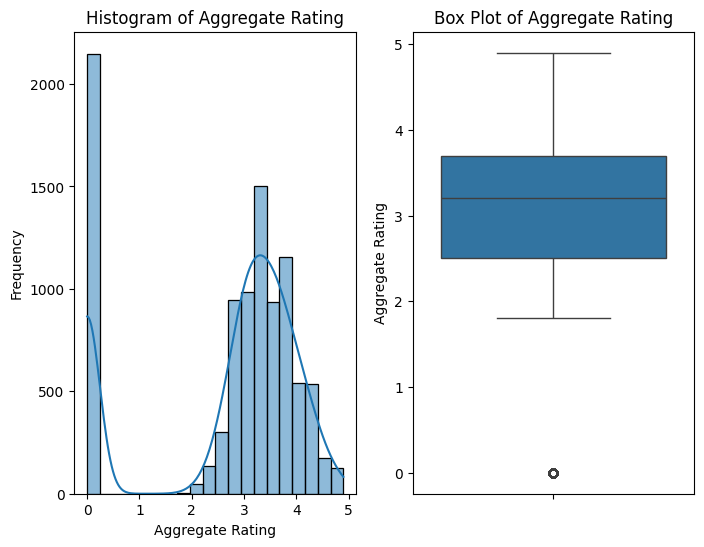

In [ ]:
# checking for ouliers in numerrical columns
# Histogram and Box plot of aggregate rating
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Histogram of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(df['Aggregate rating'])
plt.title('Box Plot of Aggregate Rating')
plt.ylabel('Aggregate Rating')

plt.show()

**From the visualization it is observed that the number of 0.0 rating is extremely high which shows that customers were not satisfied with either the goods or services gotten from the restaurants or even both**

In [ ]:
df['Aggregate rating']

,Aggregate rating
0,4.8
1,4.5
2,4.4
3,4.9
4,4.8
...,...
9546,4.1
9547,4.2
9548,3.7
9549,4.0


In [ ]:
df['Aggregate rating'].max()

4.9

In [ ]:
df['Aggregate rating'].min()

0.0

# **Descriptive Analysis**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9542.0,9.043301e+06,8.791967e+06,53.000000,301931.250000,6.002726e+06,1.835260e+07,1.850065e+07
Country Code,9542.0,1.817921e+01,5.645160e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9542.0,6.427500e+01,4.119760e+01,-157.948486,77.081565,7.719203e+01,7.728204e+01,1.748321e+02
Latitude,9542.0,2.584853e+01,1.101009e+01,-41.330428,28.478658,2.857044e+01,2.864271e+01,5.597698e+01
Average Cost for two,9542.0,1.200326e+03,1.612874e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9542.0,1.804968e+00,9.055631e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9542.0,2.665238e+00,1.516588e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9542.0,1.567721e+02,4.302033e+02,0.000000,5.000000,3.100000e+01,1.300000e+02,1.093400e+04


The dataset description shows us the statistical informations about our numerical columns, where the exponential factor(e) represents . Informations such as the mean, standard deviation, minimum values, average values(50%) and maximum values are shown in the table

In [ ]:
# Exploration of Categorical Variables
df['Cuisines'].value_counts()

,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
...,...
"World Cuisine, Patisserie, Cafe",1
"Burger, Izgara",1
"Desserts, B�_rek",1


**The top five cuisines are: North Indian; North Indian, Chinese; Chinese; Fast food and North Indian, Mughlai**

In [ ]:
df['City'].value_counts()

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
...,...
Inverloch,1
Mohali,1
Panchkula,1


**The top five cities are New Delhi, Gurgoan, Noida, Faridabad, Ghaziabad**

# **WEEK 2: DATA VISUALIZATION**
1.   Visualizations
2.   Geospatial analysis
3.   Additional analysis



# Visualization

To see the relationships between different variables, visualization is used.

In [ ]:
!pip install plotly

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# numerical and categorical columns
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [ ]:
num_cols

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [ ]:
cat_cols

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

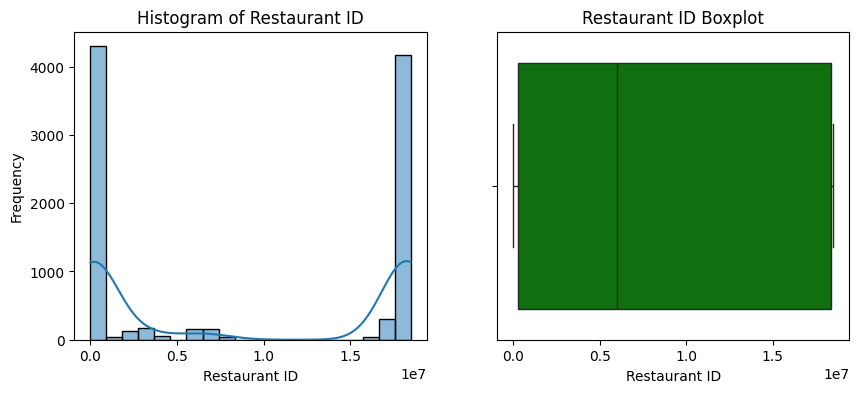

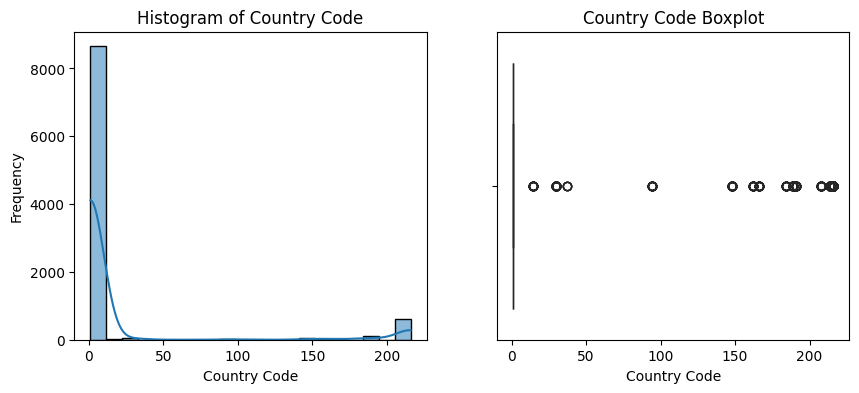

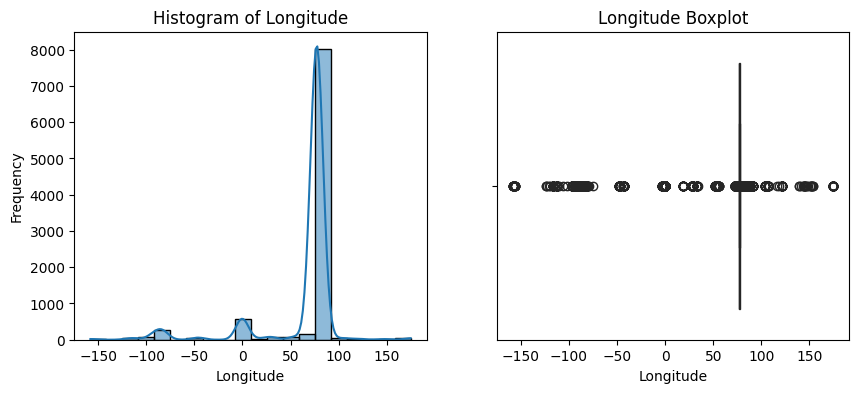

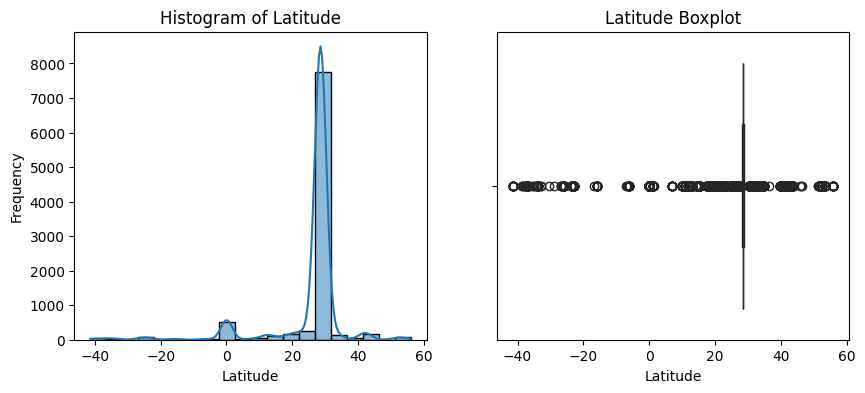

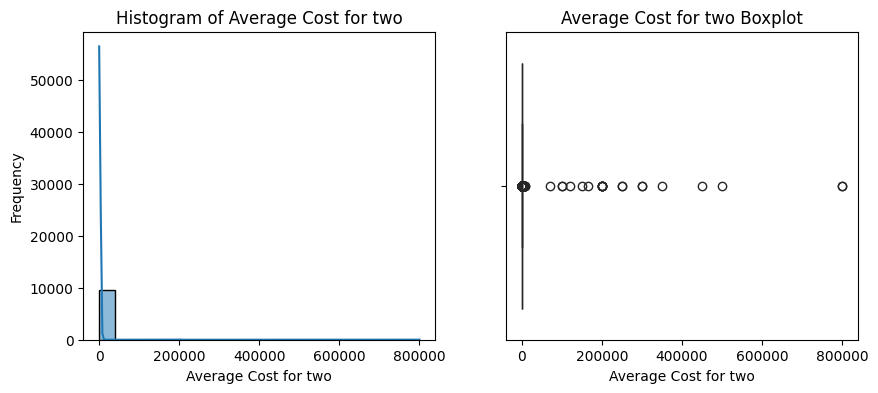

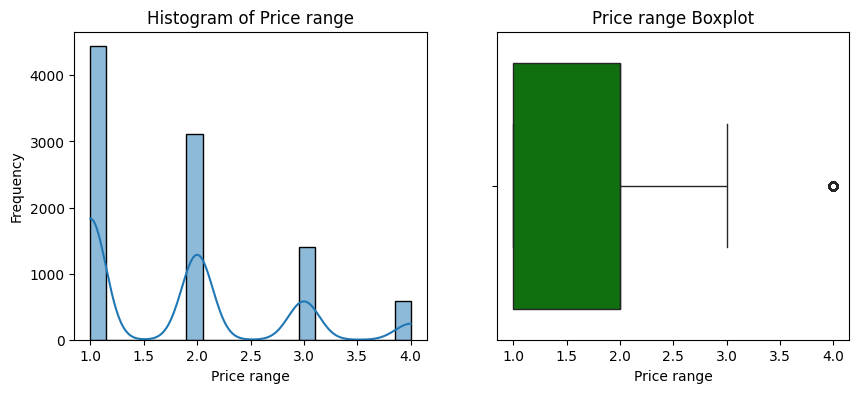

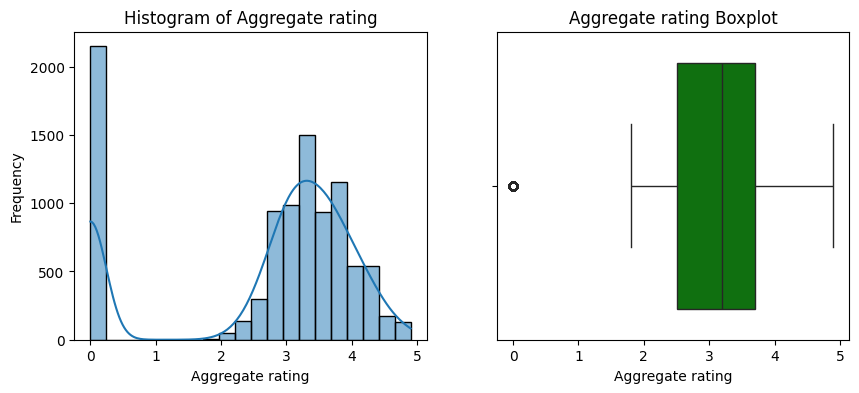

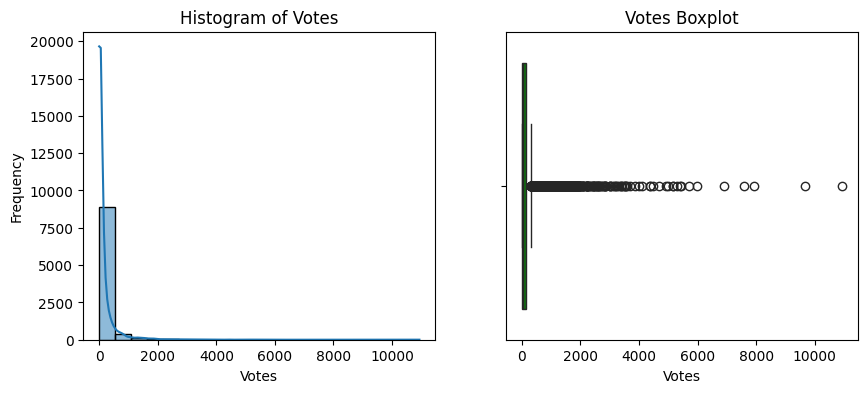

In [ ]:
# visualizing
for col in num_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    #Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='green')
    plt.title(f'{col} Boxplot')
    plt.xlabel(col)

    plt.show()

From the visualization, it can be observed that there are outliers in Country code, Longitude, Latitude, Averagecost for two, Price range, Aggregate rating and Votes.

These outliers need to be resolved to ensure that the prediction is accurate and precise

**Checking for the number of zeros in the columns with outliers to enable me know how to deal with them**

In [ ]:
zeros_agg=len(df[df['Aggregate rating'] == 0])

In [ ]:
zeros_agg

2148

There are 2148 rows in the aggregate rating column that 0.0 rating. The inference I can take from this observation is that the customers probably did not like or appreciate anything about the restaurants and therefore did not rate them.

In [ ]:
zeros_code=len(df[df['Country Code'] == 0])

In [ ]:
zeros_code

0

There are no rows with 0 input in the country code column.

In [ ]:
zeros_lng=len(df[df['Longitude'] == 0])

In [ ]:
zeros_lng

498

In [ ]:
zeros_lat=len(df[df['Latitude'] == 0])

In [ ]:
zeros_lat

498

For the longitude and latitude column 498 rows were observed to contain 0 inputs.

In [ ]:
zeros_cost=len(df[df['Average Cost for two'] == 0])

In [ ]:
zeros_cost

15

15 rows contain 0 in the average cost for two column

In [ ]:
zeros_price=len(df[df['Price range'] == 0])

In [ ]:
zeros_price

0

There are no 0 found in the price range column

In [ ]:
zeros_votes=len(df[df['Votes'] == 0])

In [ ]:
zeros_votes

1094

There are 1094 rows which contain 0 in the Votes column.

In [ ]:
rating_view = df[['Aggregate rating', 'Rating text', 'Votes', 'Rating color']]
rating_view.sample(7)

,Aggregate rating,Rating text,Votes,Rating color
7678,0.0,Not rated,3,White
7895,3.0,Average,10,Orange
1426,3.9,Good,40,Yellow
5636,0.0,Not rated,1,White
0,4.8,Excellent,314,Dark Green
2167,3.2,Average,52,Orange
4215,3.5,Good,62,Yellow


During my analysis of the ratings and votes, i observed that some vote columns had values greater than 0 but their aggregate ratings had 0 values. That made me look into it and i observed that the aggregate ratings were gotten by using the ratings gotten from each individual (from 1 to 5) against the votes and solved mathematically. Due to this fact it can be seen that some restaurants that had much more votes that some others had lesser aggregate ratings as the indivual ratings were'nt good enough- falling into lower ranges of 1 to 3.
This is a factor to the skewness that was observed in visualization where we have individual ratings as low as 1 or 2.

**Filling up rows in latitude and longitude columns with 0 with the mean of similar areas**

In [ ]:
import pandas as pd

# Group data by city and get the mean latitude and longitude for each city
city_coords = df.groupby('City')[['Latitude', 'Longitude']].mean().reset_index()

# Create a dictionary mapping cities to their coordinates
city_coords_dict = dict(zip(city_coords['City'], zip(city_coords['Latitude'], city_coords['Longitude'])))

# Fill in coordinates with 0 using the dictionary
for index, row in df.iterrows():
    if row['Latitude'] == 0 or row['Longitude'] == 0:
        city = row['City']
        if city in city_coords_dict:
            df.loc[index, ['Latitude', 'Longitude']] = city_coords_dict[city]

In [ ]:
zeros_count = len(df[df['Longitude'] == 0])

In [ ]:
zeros_count

0

Geocoders are tools that convert textual location descriptions such as address, postal codes etc., to geographic coordinates(Longitude and Latitude) and vice versa. They can also be used in for the imputation.
Seeing that a number of the rows in my latitude and longitude columns were containing 0 which are the values of the Prime Meridian on the longitude and the Equator on the latitude. I had to look for a way to input the correct latitude and longitude values.

This would enable me get a good geospatial representation.

**Outliers and their effects**



*   In the longitude and latitude columns i noticed a couple of 0's which are abnormal as no real place actually has those coordinates. While this may not be the entire reason for the outliers, I ensured I took care of them.
*   The country code visualization showed the existence of large number of outliers. After going through the the dataset, I observed that the codes ranged from 1 to numbers greater than 100 which caused the skewed visualization. Since these country codes are actual in real life i.e they represent actual places, take for instance we have countries such as USA, Canada using the +1,it's effect on the visualization can be ignored.
*   The average rating column contains lots of zeros. This implies that several customers did not rate the services of these restaurants as ratings start from 1 and ends at 5, with 1 being very poor and 5 being excellent.
*   The average cost was observed to contain 0's whereas the cost for a product or service can never be 0 of whatever currency being used. This should be a misinputation and would be looked into later on.





**Visulaizing relationship between votes and ratings**

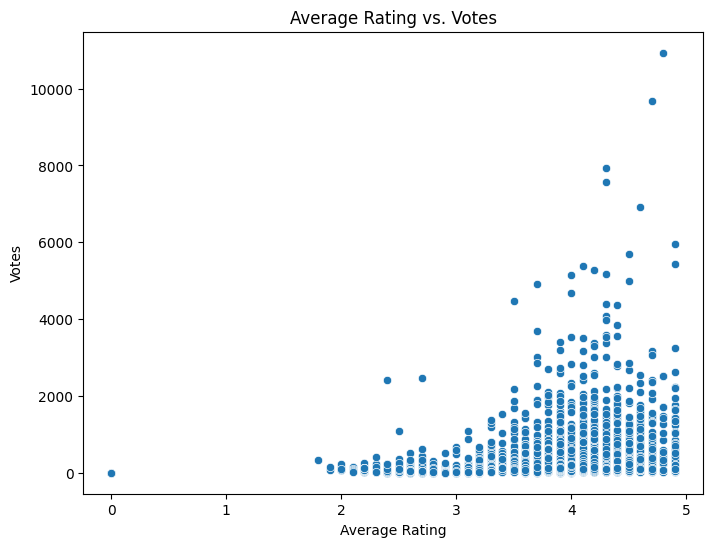

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Aggregate rating', y='Votes', data=df)
plt.title('Average Rating vs. Votes')
plt.xlabel('Average Rating')
plt.ylabel('Votes')
plt.show()

From my scatter plot I observed that there is a strong correlation between the average ratings and votes. The restaurants with the highest average ratings were observed to have a greater number of votes leading to the positive correlation. A few number of restaurants got high number of votes as most restaurants had relatively small number of votes. This is as a result of the visibility of these restaurants as these votes were based on how popular the restaurants were among customers.
The clusters show that there were a good number of restaurants with similar ratings

The higher the votes, the higher the ratings.

Using of a visualization tool called violin

In [ ]:
fig = px.violin(df, x="Aggregate rating", y="Votes")

fig.show()

# Comparing average ratings across cuisines and cities.

**Distribution for aggregate rating by Cuisine**

In [ ]:
avg_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
fig = px.bar(avg_rating_by_cuisine,  y='Aggregate rating',x='Cuisines',
             title='Average Rating by Cuisine', color_discrete_sequence=['green'])

# customizing layout
fig.update_layout(yaxis_title='Average Rating',xaxis_title='Cuisine', plot_bgcolor='lightblue', xaxis={'categoryorder':'total descending'})

fig.show()

**Distribution for aggregate rating by City**

In [ ]:
avg_rating_by_city = df.groupby('City')['Aggregate rating'].mean().reset_index()
fig = px.bar(avg_rating_by_city, x='City', y='Aggregate rating',
             title='Average Rating by City', color_discrete_sequence=['green'])

# customizing layout
fig.update_layout(xaxis_title='City', yaxis_title='Average aggregate Rating', plot_bgcolor='gray', xaxis={'categoryorder':'total descending'})

fig.show()

Using Pie chart to represent votes per city

In [ ]:
# selecting top 10 city vote counts
city_votes = df['City'].value_counts().head(10).reset_index()
city_votes.columns = ['City', 'Votes']

# Creating pie chart
fig = px.pie(city_votes, values='Votes', names='City', title='Vote Percentage by City')

fig.show()

**From the pie chart it can be observed majority of the votes cames from New Delhi city**

# Geospatial Analysis

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# For dataframe 'df' with 'Latitude', 'Longitude', 'City', and 'Restaurant Name' columns

# Creating geodata frame for mapping locations
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", hover_name="Restaurant Name", hover_data=["City", "Cuisines"],
                        color_discrete_sequence=["darkorange"], zoom=3, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

The map is an 'Open street map'. An open street map is a map that includes data about roads, buildings, addresses, shops and businesses, points of interest, land use and natural features and much more.

It includes features such as hover name which is the restaurant name, hover data which includes the city names and the cuisines offered by the restaurant. For the margin layout, r = right side, t = top, l = left side, b = bottom. The margin layout was used to adjust the different sides removing any spaces around the map

In [ ]:
import plotly.express as px

city = df['City'].value_counts().head(30)
fig = px.bar(city, x=city.index, y=city.values, title="Number of Restaurants in Each City (Top 30)",
             color=city.values, color_continuous_scale="Plasma", text=city.values
            )

fig.update_layout(
    xaxis_title="City",
    yaxis_title="Number of Restaurants",
    xaxis={'categoryorder':'total descending'},
    plot_bgcolor='rgba(0,0,0,0)',  # Sets plot background to transparent
    xaxis_tickangle=-45,
    font=dict(family="Arial", size=12, color="black")  # Customize font style
)

fig.update_traces(texttemplate='%{text}', textposition='outside')  # Position text labels outside bars

fig.show()

Correlating location[Longitude and Latitude] with rating

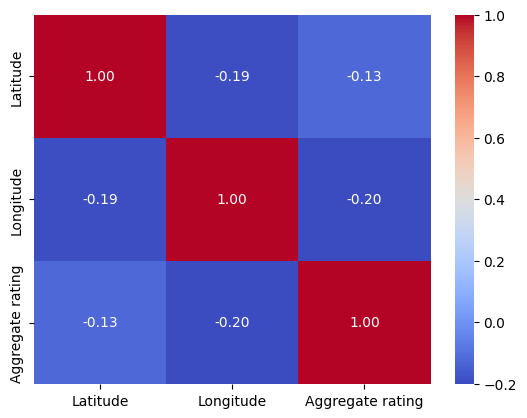

In [ ]:
sns.heatmap(df[['Latitude', 'Longitude', 'Aggregate rating']].corr(), annot=True, fmt='.2f', cmap= 'coolwarm')
plt.show()

From this correlation heat map it can be seen that there is a weak correlation or relationship between latitude and aggregate rating hence the -0.13 and as longitude tends to increase aggregate rating reduces explaining the negative correlation value. This could be as a result of the skewness in the aggregate rating column. Later on, if transformation is done we will see if there will be a difference in the the correlation heat map.

# **WEEK 3: CUSTOMER PEFERENCES**

1.   Cuisine Analysis
2.   Price Range
3.   Service Features

## Identifying highest rated cuisines

In [ ]:
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

highest_rated_cuisines = cuisine_ratings.sort_values(by=['Aggregate rating'], ascending=False)

In [ ]:
highest_rated_cuisines.head(20)

,Cuisines,Aggregate rating
302,"Burger, Bar Food, Steak",4.90
33,"American, Burger, Grill",4.90
37,"American, Caribbean, Seafood",4.90
41,"American, Coffee and Tea",4.90
1214,"Mexican, American, Healthy Food",4.90
1034,"Italian, Bakery, Continental",4.90
169,"BBQ, Breakfast, Southern",4.90
808,"European, German",4.90
949,"Hawaiian, Seafood",4.90
1779,"Sunda, Indonesian",4.90


The highest rating for a cuisine is 4.90 and there were 18 cuisines with this rating. It shows that so many customers preferred these cuisines and therefore they were rated highly.

## Comparing ratings across price points

In [ ]:
avg_rating_by_city = df.groupby('Price range')['Aggregate rating'].mean().reset_index()
fig = px.bar(avg_rating_by_city, x='Price range', y='Aggregate rating',
             title='Average Rating by Price range', color_discrete_sequence=['green'])

# customizing layout
fig.update_layout(xaxis_title='Price range', yaxis_title='Average aggregate Rating', plot_bgcolor='gray', xaxis={'categoryorder':'total descending'})

fig.show()

Price range 4 receives the highest rating.

## Identifying highest rated cuisines

In [ ]:
# selecting top 20 cuisines vote counts
city_votes = df['Cuisines'].value_counts().head(20).reset_index()
city_votes.columns = ['Cuisines', 'Votes']

# Creating pie chart
fig = px.pie(city_votes, values='Votes', names='Cuisines', title='Vote Percentage by Cuisines')

fig.show()

Using pie chart I have been able to show the top 20 highest rated cuisines. The highest voted cuisine is the North Indian cuisine with 936 votes; North India, Chinese cuisne was the second highest with 511 votes.

## Analysing Table Booking and Delivery

In [ ]:
df['Has Table booking']

,Has Table booking
0,Yes
1,Yes
2,Yes
3,No
4,Yes
...,...
9546,No
9547,No
9548,No
9549,No


In [ ]:
df['Has Table booking'].value_counts()['Yes']

np.int64(1158)

In [ ]:
df['Has Table booking'].value_counts()['No']

np.int64(8384)

The amount of restaurants that do not offer table booking is 8384 that is 87.86% while those that offer table booking is 1158 i.e, 12.14%.

In [ ]:
Booking_Delivery = df[['Has Table booking', 'Has Online delivery', 'Is delivering now']]

In [ ]:
Booking_Delivery.sample(5)

,Has Table booking,Has Online delivery,Is delivering now
6129,No,No,No
6053,No,No,No
5501,No,Yes,No
8128,No,No,No
670,No,No,No


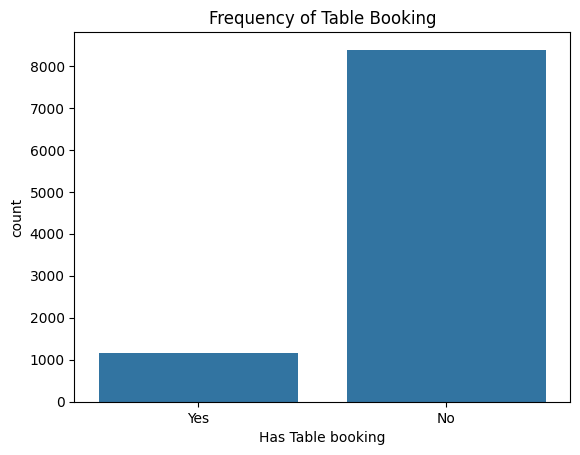

In [ ]:
sns.countplot(x='Has Table booking', data=df)
plt.title('Frequency of Table Booking')
plt.show()

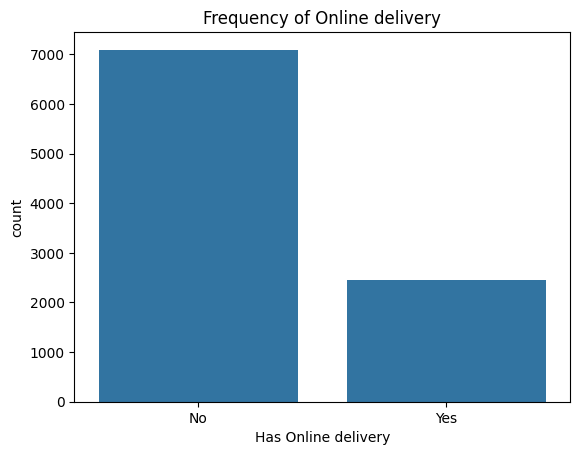

In [ ]:
sns.countplot(x='Has Online delivery', data=df)
plt.title('Frequency of Online delivery')
plt.show()

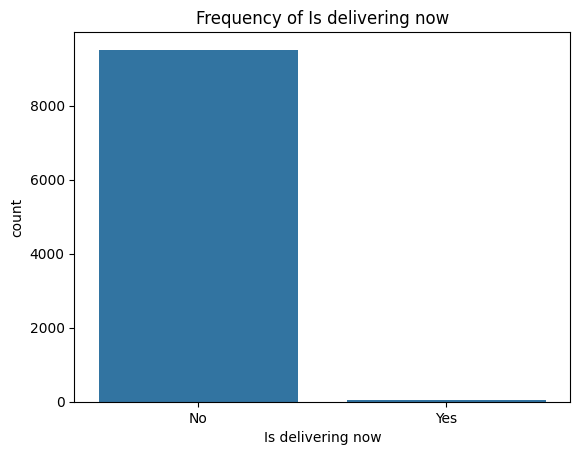

In [ ]:
sns.countplot(x='Is delivering now', data=df)
plt.title('Frequency of Is delivering now')
plt.show()

From the table and visualization, it can be seen that most restaurants do not  have table booking and online delivery. The relationship between these two columns may differ. Where table booking may be 'yes' online delivery may be 'no'. There are also situations where both columns contain the same value.

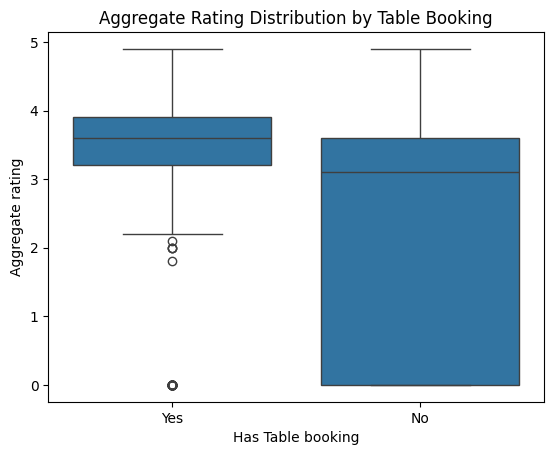

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Has Table booking', y='Aggregate rating', data=df)
plt.title('Aggregate Rating Distribution by Table Booking')
plt.show()

In [ ]:
table_booking_comparison = df[['Has Table booking', 'Aggregate rating']]

In [ ]:
table_booking_comparison.sample(5)

,Has Table booking,Aggregate rating
5086,No,0.0
4474,No,3.1
3205,No,2.9
4789,No,0.0
5128,Yes,3.3


It can be observed from this table that there is a relationship between 'Has table booking' and 'Aggregate Rating'. The restaurants without table booking tend to have lower ratings, while this might not be the cause it is observed that there is a correlation between them. While when the restaurants offer table booking the average rating is high.

**Online Delivery Analysis**

In [ ]:
# Checking for restaurants offering delivery.
df['Has Online delivery'].value_counts()

,count
Has Online delivery,
No,7091
Yes,2451


In [ ]:
#Checking the percentage of restaurants offering delivery
delivery_count = df['Has Online delivery'].value_counts()['Yes']
total_restaurants = len(df)
delivery_percentage = (delivery_count / total_restaurants) * 100

In [ ]:
delivery_percentage

np.float64(25.686438901697755)

The percentage of restaurants offering online delivery is 25.68% which is less than 50% of the number of restaurants

In [ ]:
Delivery_Range_Comparism = df[['Has Online delivery', 'Price range']]

In [ ]:
Delivery_Range_Comparism.sample(5)

,Has Online delivery,Price range
8170,No,2
2879,No,1
6736,No,1
8480,No,1
2106,Yes,1


From this table it can be said that the price range does not determine if the restaurant offers online delivery or not.

In [ ]:
# Example: Analyzing cuisine preferences by city
city_cuisine_ratings = df.groupby(['City', 'Cuisines'])['Aggregate rating'].mean().reset_index()

In [ ]:
city_cuisine_ratings.sample(5)

,City,Cuisines,Aggregate rating
1931,New Delhi,"Japanese, Korean",3.60
1258,Lucknow,"Cafe, Chinese, Thai, North Indian, Continental",4.00
1314,Makati City,Japanese,4.50
681,Ghaziabad,Chinese,2.75
2263,New Delhi,"South Indian, North Indian, Chinese, Fast Food...",3.50


Some cuisines are rated more highly than the others in different cities.

Checking for the highest rated cuisines in New Delhi.

In [ ]:
#Finding top cuisines in New Delhi
new_delhi_preferences = city_cuisine_ratings[city_cuisine_ratings['City'] == 'New Delhi']

In [ ]:
new_delhi_preferences

,City,Cuisines,Aggregate rating
1429,New Delhi,Afghani,1.450
1430,New Delhi,"Afghani, Mughlai, Chinese",0.000
1431,New Delhi,"Afghani, North Indian, Pakistani, Arabian",0.000
1432,New Delhi,American,2.175
1433,New Delhi,"American, Asian, European, Seafood",4.600
...,...,...,...
2316,New Delhi,"Tibetan, South Indian, North Indian",0.000
2317,New Delhi,Turkish,2.950
2318,New Delhi,"Turkish, Arabian, Moroccan, Lebanese",0.000
2319,New Delhi,"Turkish, Mediterranean, Middle Eastern",4.300


# Predictive Modelling

1.   Feature Engineering
2.   Model Building
3.   Model Evaluation



### Feature Enginnering

In [ ]:
df['Price range'].max()

4

In [ ]:
df['Price Category'] = pd.cut(
    df['Price range'],
    bins=[0,1, 2, 3, 4],
    labels = ['Budget Friendly', 'Mid Range', 'Expensive', 'Luxury Dining']
)

In [ ]:
df['Cuisine Count'] = df['Cuisines'].apply(lambda x: len(x.split(',')))

In [ ]:
df.sample(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Price Category,Cuisine Count
419,17144991,Coconuts Fish Cafe,216,Rest of Hawaii,1279 S Kihei Road Kihei HI 96753,Kihei,Kihei Rest of Hawaii,-156.455284,20.748838,Seafood,...,No,No,No,3,4.5,Dark Green,Excellent,487,Expensive,1
594,208778,SALT,214,Dubai,Kite Beach Street 2D Umm Suqeim Dubai,Kite Beach Umm Suqeim,Kite Beach Umm Suqeim Dubai,55.211528,25.168128,"Fast Food, Burger",...,No,No,No,3,4.3,Green,Very Good,1351,Expensive,2


In [ ]:
# numerical and categorical columns
num_cols = df.select_dtypes(include = np.number).columns
cat_cols = df.select_dtypes(['object']).columns

In [ ]:
num_cols

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes',
       'Cuisine Count'],
      dtype='object')

In [ ]:
cat_cols

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

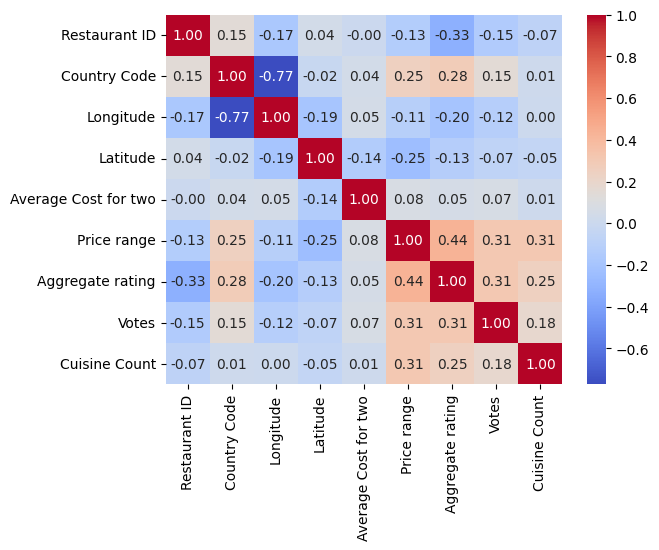

In [ ]:
# Correlation of numerical columns
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

**Data Splitting**

In [ ]:
X = df.drop(columns = ['Aggregate rating'])
Y = df['Aggregate rating']

In [ ]:
X

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text,Votes,Price Category,Cuisine Count
0,6317637,Le Petit Souffle,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,Dark Green,Excellent,314,Expensive,3
1,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121.014101,14.553708,Japanese,...,Yes,No,No,No,3,Dark Green,Excellent,591,Expensive,1
2,6300002,Heat Edsa Shangri La,162,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,Green,Very Good,270,Luxury Dining,4
3,6318506,Ooma,162,Mandaluyong City,Third Floor Mega Fashion Hall SM Megamall Orti...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,Dark Green,Excellent,365,Luxury Dining,2
4,6314302,Sambo Kojin,162,Mandaluyong City,Third Floor Mega Atrium SM Megamall Ortigas Ma...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,Dark Green,Excellent,229,Luxury Dining,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,Istanbul,Kemanke Karamustafa Paa Mahallesi R۱ht۱m Cadde...,Karak_y,Karak_y Istanbul,28.977392,41.022793,Turkish,...,No,No,No,No,3,Green,Very Good,788,Expensive,1
9547,5908749,Ceviz A ac۱,208,Istanbul,Kouyolu Mahallesi Muhittin st_nda Caddesi No 8...,Kouyolu,Kouyolu Istanbul,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,Green,Very Good,1034,Expensive,3
9548,5915807,Huqqa,208,Istanbul,Kuru_eme Mahallesi Muallim Naci Caddesi No 56 ...,Kuru_eme,Kuru_eme Istanbul,29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,Yellow,Good,661,Luxury Dining,2
9549,5916112,A k Kahve,208,Istanbul,Kuru_eme Mahallesi Muallim Naci Caddesi No 64B...,Kuru_eme,Kuru_eme Istanbul,29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,Green,Very Good,901,Luxury Dining,1


In [ ]:
Y

,Aggregate rating
0,4.8
1,4.5
2,4.4
3,4.9
4,4.8
...,...
9546,4.1
9547,4.2
9548,3.7
9549,4.0


In [ ]:
from sklearn.model_selection import train_test_split
train_inputs, test_input, train_targets, test_target = train_test_split(X, Y, test_size=0.2, random_state=42)

**Data Preprocessing**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
encoder = OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown='ignore')
train_inputs.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text,Votes,Price Category,Cuisine Count
8177,18383466,Vaango,1,Noida,Food Court 3rd Floor Logix City Centre Sector ...,Logix City Centre Sector 32 Noida,Logix City Centre Sector 32 Noida Noida,77.353663,28.574219,South Indian,...,No,No,No,No,1,Orange,Average,6,Budget Friendly,1
6401,216,Domino s Pizza,1,New Delhi,2728 Central Market West Punjabi Bagh New Delhi,Punjabi Bagh,Punjabi Bagh New Delhi,77.134360,28.671141,"Pizza, Fast Food",...,No,No,No,No,2,Orange,Average,112,Mid Range,2


In [ ]:
train_cat = encoder.fit_transform(train_inputs[cat_cols])
test_cat = encoder.transform(test_input[cat_cols])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [0, 1, 2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros



In [ ]:
# updating numerical columns
num_cols = num_cols.drop(['Aggregate rating'])

scaler = StandardScaler()
train_num = scaler.fit_transform(train_inputs[num_cols])
test_num = scaler.transform(test_input[num_cols])

In [ ]:
train_num

array([[ 1.05698067, -0.30189292,  0.24513827, ..., -0.8821815 ,
        -0.34649709, -0.96974039],
       [-1.0328295 , -0.30189292,  0.23944347, ...,  0.21809487,
        -0.10550715, -0.05194394],
       [-0.26963161,  0.21509296, -2.97747236, ...,  2.41864762,
        -0.33512964, -0.05194394],
       ...,
       [-0.99727411, -0.30189292,  0.23927964, ...,  0.21809487,
        -0.35104407, -0.96974039],
       [-0.99855323, -0.30189292,  0.24389393, ..., -0.8821815 ,
        -0.3442236 , -0.96974039],
       [ 1.05451426, -0.30189292,  0.24002228, ..., -0.8821815 ,
        -0.35331756, -0.96974039]])

In [ ]:
test_num

array([[ 1.02803862, -0.30189292,  0.15555296, ..., -0.8821815 ,
        -0.35559105, -0.05194394],
       [ 1.04544088, -0.30189292,  0.23762226, ...,  1.31837125,
        -0.12142158, -0.05194394],
       [-0.99842057, -0.30189292,  0.2424635 , ..., -0.8821815 ,
        -0.23509608, -0.96974039],
       ...,
       [ 1.04207697, -0.30189292,  0.24595827, ..., -0.8821815 ,
        -0.36013803, -0.05194394],
       [ 1.07016574, -0.30189292,  0.23742972, ..., -0.8821815 ,
        -0.35331756, -0.05194394],
       [-1.03244094, -0.30189292,  0.24249914, ..., -0.8821815 ,
        -0.15325044, -0.96974039]])

In [ ]:
# Combining
train_processed = np.hstack((train_num, train_cat))
test_processed = np.hstack((test_num, test_cat))

In [ ]:
train_processed

array([[ 1.05698067, -0.30189292,  0.24513827, ...,  0.        ,
         0.        ,  0.        ],
       [-1.0328295 , -0.30189292,  0.23944347, ...,  0.        ,
         0.        ,  0.        ],
       [-0.26963161,  0.21509296, -2.97747236, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.99727411, -0.30189292,  0.23927964, ...,  0.        ,
         0.        ,  0.        ],
       [-0.99855323, -0.30189292,  0.24389393, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.05451426, -0.30189292,  0.24002228, ...,  1.        ,
         0.        ,  0.        ]])

## Model Selection

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### **Using Linear Regression**

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(train_processed, train_targets)

LinearRegression()

In [ ]:
train_pred = model.predict(train_processed)
test_pred = model.predict(test_processed)

## Model Evaluation

In [ ]:
train_mse = mean_squared_error(train_targets, train_pred)
train_mae = mean_absolute_error(train_targets, train_pred)

In [ ]:
train_mse, train_mae

(2.73630504496265e-20, 3.960869255767204e-11)

In [ ]:
test_mse = mean_squared_error(test_target, test_pred)
test_mae = mean_absolute_error(test_target, test_pred)

In [ ]:
test_mse, test_mae

(6074381.740774673, 772.9214737244492)

## Model Performance

In [ ]:
train_score = r2_score(train_targets, train_pred)
test_score = r2_score(test_target, test_pred)

In [ ]:
train_score, test_score

(1.0, -2652530.146833978)

### **Using Decision tree regressor**

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
model.fit(train_processed, train_targets)

DecisionTreeRegressor()

In [ ]:
train_pred = model.predict(train_processed)
test_pred = model.predict(test_processed)

In [ ]:
train_pred

array([2.8, 3.2, 4.1, ..., 3. , 2.8, 0. ])

## Model Evaluation

In [ ]:
train_mse = mean_squared_error(train_targets, train_pred)
train_mae = mean_absolute_error(train_targets, train_pred)

In [ ]:
train_mse, train_mae

(2.2168303965663176e-32, 3.7817108136059307e-17)

In [ ]:
test_mse = mean_squared_error(test_target, test_pred)
test_mae = mean_absolute_error(test_target, test_pred)

In [ ]:
test_mse, test_mae

(0.05079622839182817, 0.1381351492928235)

## Model Performance

In [ ]:
train_score = r2_score(train_targets, train_pred)
test_score = r2_score(test_target, test_pred)

In [ ]:
train_score, test_score

(1.0, 0.9778185527842981)

### **Using Random forest**

In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(train_processed, train_targets)

RandomForestRegressor()

In [ ]:
train_pred = model.predict(train_processed)
test_pred = model.predict(test_processed)

## Model Evaluation

In [ ]:
train_mse = mean_squared_error(train_targets, train_pred)
train_mae = mean_absolute_error(train_targets, train_pred)

In [ ]:
train_mse, train_mae

(0.00386743233328968, 0.04009786453556945)

In [ ]:
test_mse = mean_squared_error(test_target, test_pred)
test_mae = mean_absolute_error(test_target, test_pred)

In [ ]:
test_mse, test_mae

(0.02879683551597694, 0.11084599266631745)

## Model Performance

In [ ]:
train_score = r2_score(train_targets, train_pred)
test_score = r2_score(test_target, test_pred)

In [ ]:
train_score, test_score

(0.9983201171186824, 0.9874251394798506)

In [ ]:
# Comparing algorithms
algorithm_names = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [-2652530.1468, 0.9778, 0.9874]

In [ ]:
df_scores = pd.DataFrame({'Algorithm': algorithm_names, 'R2 Score': r2_scores})

In [ ]:
df_scores

,Algorithm,R2 Score
0,Linear Regression,-2.652530e+06
1,Decision Tree,9.778000e-01
2,Random Forest,9.874000e-01


from matplotlib import pyplot as plt
df_scores['R2 Score'].plot(kind='hist', bins=20, title='R2 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_scores.groupby('Algorithm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['R2 Score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'R2 Score'}, axis=1)
              .sort_values('R2 Score', ascending=True))
  xs = counted['R2 Score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_scores.sort_values('R2 Score', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Algorithm')):
  _plot_series(series, series_name, i)
  fig.legend(title='Algorithm', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('R2 Score')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_scores['R2 Score'].plot(kind='line', figsize=(8, 4), title='R2 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_scores['Algorithm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_scores, x='R2 Score', y='Algorithm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

The best model I used is the random forest model.

I went through the whole analysis and machine learning process without transforming my columns, some of them contained outliers but I went about it like that. Going through this project work draws insight towards a lot of things.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')